<a href="https://colab.research.google.com/github/MulanSchneeberg/Deep-Learning-With-Python/blob/master/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.datasets import imdb

In [53]:
(train_data, train_label), (test_data, test_label)=imdb.load_data(num_words=10000)

In [54]:
train_data.shape

(25000,)

In [55]:
train_data[:1]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

In [56]:
train_label.shape

(25000,)

In [57]:
train_label[:1]

array([1])

In [58]:
word_index=imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [59]:
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [60]:
decoded_review=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [61]:
import numpy as np
def vectorize_sequence(sequence, dimension=10000):
  results=np.zeros((len(sequence), dimension))
  for i, sequence in enumerate(sequence):
    for j in sequence:
      results[i, j]=1.
  return results

In [62]:
x_train=vectorize_sequence(train_data)
x_test=vectorize_sequence(test_data)
y_train=np.asarray(train_label).astype(np.float32)
y_test=np.asarray(train_label).astype(np.float32)

In [63]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [64]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [65]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [66]:
y_test

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [67]:
model=tf.keras.Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [68]:

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
history=model.fit(x_train[:10000], y_train[:10000], batch_size=512, epochs=20, validation_data=(x_train[10000:], y_train[10000:]) )

Epoch 1/20
20/20 [==============================] - 3s 75ms/step - loss: 0.5375 - accuracy: 0.7541 - val_loss: 0.4416 - val_accuracy: 0.8195
Epoch 2/20
20/20 [==============================] - 1s 46ms/step - loss: 0.3267 - accuracy: 0.8989 - val_loss: 0.3485 - val_accuracy: 0.8645
Epoch 3/20
20/20 [==============================] - 1s 45ms/step - loss: 0.2425 - accuracy: 0.9262 - val_loss: 0.3019 - val_accuracy: 0.8835
Epoch 4/20
20/20 [==============================] - 1s 46ms/step - loss: 0.1838 - accuracy: 0.9474 - val_loss: 0.3006 - val_accuracy: 0.8830
Epoch 5/20
20/20 [==============================] - 1s 47ms/step - loss: 0.1476 - accuracy: 0.9605 - val_loss: 0.3130 - val_accuracy: 0.8777
Epoch 6/20
20/20 [==============================] - 1s 46ms/step - loss: 0.1168 - accuracy: 0.9715 - val_loss: 0.2971 - val_accuracy: 0.8855
Epoch 7/20
20/20 [==============================] - 1s 61ms/step - loss: 0.0975 - accuracy: 0.9766 - val_loss: 0.3129 - val_accuracy: 0.8797
Epoch 8/20
20

In [70]:
history.history

{'loss': [0.537509024143219,
  0.32669326663017273,
  0.24251726269721985,
  0.1837737113237381,
  0.1475890874862671,
  0.11681079119443893,
  0.09745286405086517,
  0.07786506414413452,
  0.05951657146215439,
  0.04932514950633049,
  0.03721984475851059,
  0.030792297795414925,
  0.025084156543016434,
  0.018335819244384766,
  0.01299331709742546,
  0.014455465599894524,
  0.00696395942941308,
  0.0056848241947591305,
  0.007393501233309507,
  0.0031139038037508726],
 'accuracy': [0.7541000247001648,
  0.8988999724388123,
  0.9261999726295471,
  0.9473999738693237,
  0.9605000019073486,
  0.9714999794960022,
  0.9765999913215637,
  0.982699990272522,
  0.9887999892234802,
  0.991100013256073,
  0.9939000010490417,
  0.995199978351593,
  0.996399998664856,
  0.9976000189781189,
  0.9987999796867371,
  0.9976999759674072,
  0.9995999932289124,
  0.9995999932289124,
  0.9991999864578247,
  0.9998999834060669],
 'val_loss': [0.4415701925754547,
  0.34846392273902893,
  0.3018511533737182

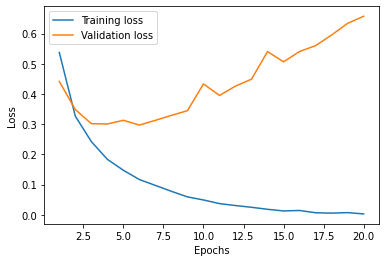

In [71]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values,label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

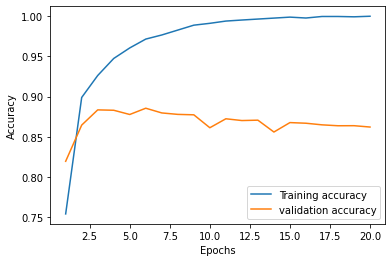

In [72]:
plt.clf()
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
epochs=range(1, len(loss_values)+1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc ,label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()